

##### Goal of the case study

> Report the attributes of attrition and other patterns. The results thus obtained will be used by the management to understand what changes 
they should make to their workplace, in order to get most of their employees to stay.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")
print('libraries have been imported')

libraries have been imported


In [2]:
import psycopg2

from sqlalchemy import create_engine

 
hostname= 'localhost'
database='jcw_hr'
uname='postgres'
paswd='Mypass22'
port_id='5432'

#A lonf string that contains the necessary Postgres Login information
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'.format(username=uname,password=paswd,                                                                                     ipaddress=hostname,port=port_id,
                                                                                        dbname=database))

#create the connection
conn= create_engine(postgres_str)    
    

# Connect to PostgreSQL server
dbconn = conn.connect();


df_emp1 = pd.read_sql_query ('''SELECT * FROM employee_survey_data;''',dbconn)
df_gen1 = pd.read_sql_query ('''SELECT * FROM general_data;''',conn)
df_man1 = pd.read_sql_query ('''SELECT * FROM manager_survey_data;''',dbconn)
 

# Close the database connection
dbconn.close();

In [3]:
df_emp1.shape

(4410, 4)

In [4]:
df_gen1.shape

(4410, 24)

In [5]:
df_man1.shape

(4410, 3)

#    # 1. Merge all 3 tables together.

In [6]:
print('Employee table column names: ', df_emp1.columns)
print('General table column names: ', df_gen1.columns)
print('Manager table column names: ', df_man1.columns)

Employee table column names:  Index(['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance'],
      dtype='object')
General table column names:  Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
Manager table column names:  Index(['EmployeeID', 'JobInvolvement', 'PerformanceRating'], dtype='object')


In [7]:
# 'EmployeeID' column is common to all three tables. We will use this to join all 3 tables.

In [8]:
df_t0 = pd.merge(df_emp1,df_gen1,on='EmployeeID')
df_master = pd.merge(df_t0,df_man1,on='EmployeeID')

In [9]:
# df_master is our master table which should have 4410 records and 29 attributes.
df_master.shape

(4410, 29)

#    # 2. Check nulls and duplicates

In [10]:
# We don't have duplicated values
df_master.duplicated().sum()

0

In [11]:
# return No of null values in each column
df_master.isna().sum()

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
JobInvolvement              0
PerformanceRating           0
dtype: int64

#   # 3 check distribution and decide weather to fill with mean/mode/median or drop.

In [12]:
# calculate the percentage of null values in each columns
percentage= (df_master.isna().sum()/4410)*100

In [13]:
print(percentage)

EmployeeID                 0.000000
EnvironmentSatisfaction    0.566893
JobSatisfaction            0.453515
WorkLifeBalance            0.861678
Age                        0.000000
Attrition                  0.000000
BusinessTravel             0.000000
Department                 0.000000
DistanceFromHome           0.000000
Education                  0.000000
EducationField             0.000000
EmployeeCount              0.000000
Gender                     0.000000
JobLevel                   0.000000
JobRole                    0.000000
MaritalStatus              0.000000
MonthlyIncome              0.000000
NumCompaniesWorked         0.430839
Over18                     0.000000
PercentSalaryHike          0.000000
StandardHours              0.000000
StockOptionLevel           0.000000
TotalWorkingYears          0.204082
TrainingTimesLastYear      0.000000
YearsAtCompany             0.000000
YearsSinceLastPromotion    0.000000
YearsWithCurrManager       0.000000
JobInvolvement             0

In [14]:
# the highest percentage of nulls is in column WorkLifeBalance (0.86%). 
# in this ecenario we either drop all the nul values (data loss will be very small) or we can replace null values 
# with the mean. 
# depenping on the distribution of the variables with missing values we will decide the fill null values with 
# either mean (average) or Median or mode.

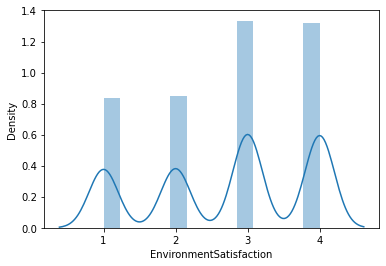

In [15]:

sns.distplot(df_master.EnvironmentSatisfaction)
plt.show()

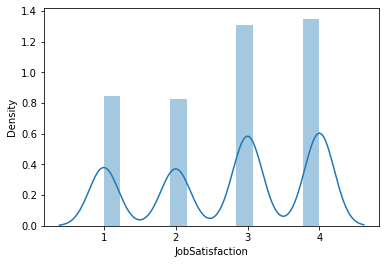

In [68]:
sns.distplot(df_master.JobSatisfaction)
plt.show()

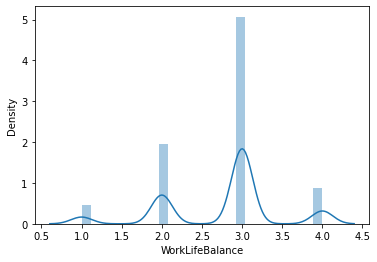

In [69]:
sns.distplot(df_master.WorkLifeBalance)
plt.show()

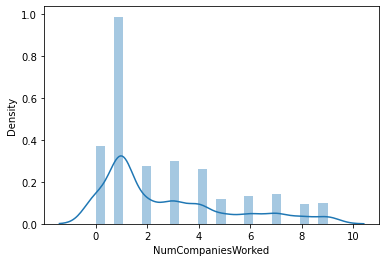

In [70]:
sns.distplot(df_master.NumCompaniesWorked)
plt.show()

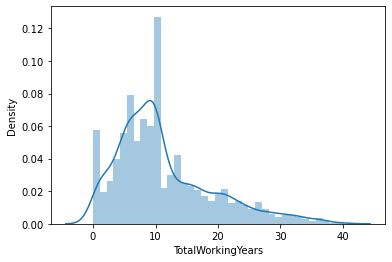

In [71]:
sns.distplot(df_master.TotalWorkingYears)
plt.show()

In [ ]:
# as the graphs show the variable with missing data don't follow a neat normal distribution, 
# therefore we will use the mode for the variables with discrete data. 
# Given that TotalWorkingYears and NumcompaniesWorked are continuous we will use the median instead.

In [87]:
# mode calculation:
print( 'Environment Satisfaction mode is: ', df_master['EnvironmentSatisfaction'].mode())
print( 'Job Satisfaction mode is: ', df_master['JobSatisfaction'].mode())
print( 'Work Life Balance mode is: ', df_master['WorkLifeBalance'].mode())
print( 'Num Companies Worked mode is: ', df_master['NumCompaniesWorked'].mode())     
print( 'Total Working Years mode is: ', df_master['TotalWorkingYears'].mode())      
print( 'Num Companies Worked median is: ', df_master['NumCompaniesWorked'].median())
print( 'Total Working Years median is: ', df_master['TotalWorkingYears'].median())

Environment Satisfaction mode is:  0    3.0
Name: EnvironmentSatisfaction, dtype: float64
Job Satisfaction mode is:  0    4.0
Name: JobSatisfaction, dtype: float64
Work Life Balance mode is:  0    3.0
Name: WorkLifeBalance, dtype: float64
Num Companies Worked mode is:  0    1.0
Name: NumCompaniesWorked, dtype: float64
Total Working Years mode is:  0    10.0
Name: TotalWorkingYears, dtype: float64
Num Companies Worked median is:  2.0
Total Working Years median is:  10.0


In [16]:
# replace nulls with calculated mode
df_master.fillna({'EnvironmentSatisfaction': 3.0, 'JobSatisfaction': 4.0, 'WorkLifeBalance': 3.0, 'NumCompaniesWorked': 2.0, 'TotalWorkingYears': 10.0}, inplace=True)

In [17]:
# check nulls are filled
df_master.isna().sum()

EmployeeID                 0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
JobInvolvement             0
PerformanceRating          0
dtype: int64

In [18]:
# Let's divide our variables into categorical and continuos 
categorical_var=[]
continuous_var=[]
for i in df_master.columns:
    if df_master[i].nunique() <=9: # we've used 9 because role role have 9 diff values
        categorical_var.append(i)
    else:
        continuous_var.append(i)

In [14]:
print('categorical variables: ', categorical_var)
print('Number of categorical variables is: ', len(categorical_var))
print('continuous variables: ', continuous_var)
print('Number of continuous variables is: ', len(continuous_var))
print('Total Number of variables: ', len(continuous_var)+len(categorical_var))

categorical variables:  ['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EmployeeCount', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'Over18', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear', 'JobInvolvement', 'PerformanceRating']
Number of categorical variables is:  19
continuous variables:  ['EmployeeID', 'Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Number of continuous variables is:  10
Total Number of variables:  29


In [19]:
# let's remove the EmployeeID as this is not a variable of interest, it's just an ID number
continuous_var1=['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
len(continuous_var1)

9

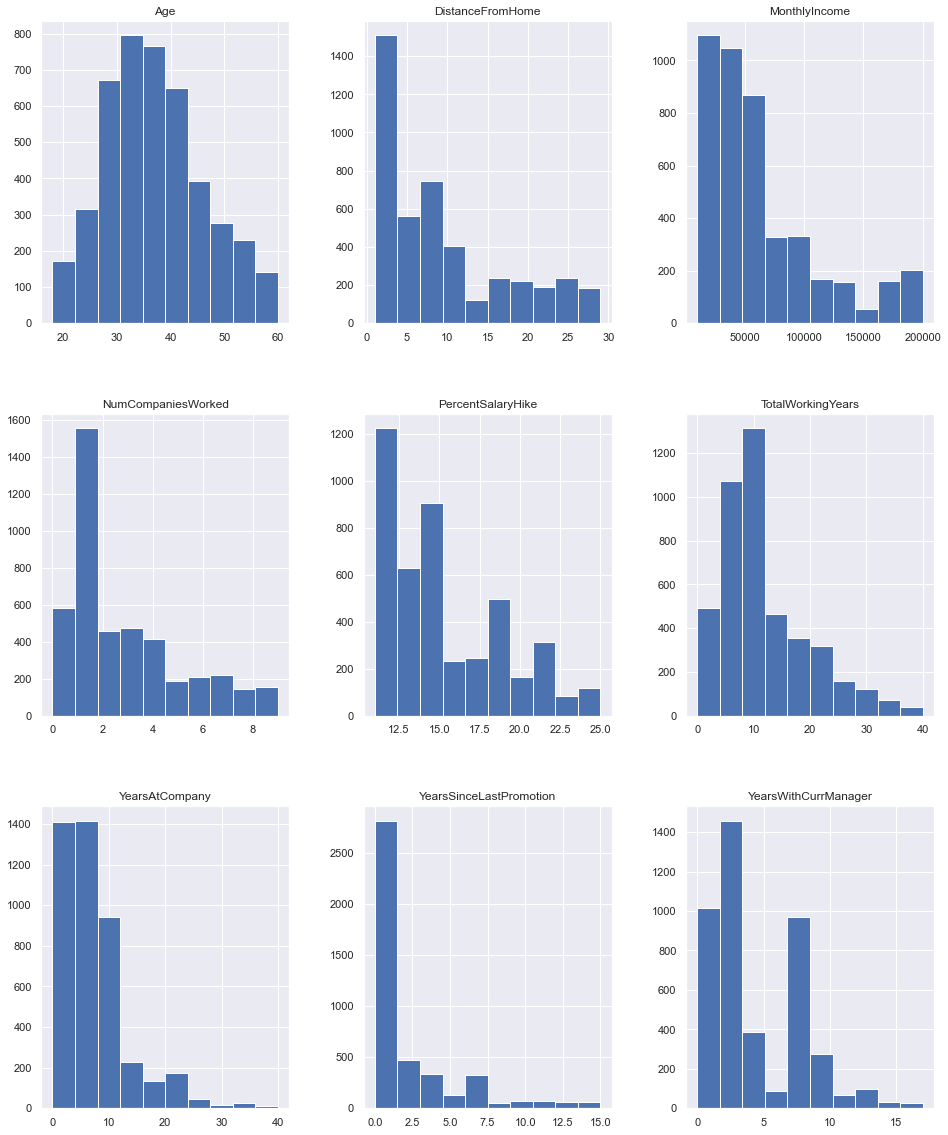

In [128]:
# we'll check the distribution of the continuous variables with a histogram:
df_master.hist(continuous_var1)
#plt.figure(figsize=(10,10))
sns.set(rc={'figure.figsize':(16,20)})
plt.show()

In [ ]:
# with the exception of age with a 

In [130]:
df_master[continuous_var].describe()

,EmployeeID,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,2205.500000,36.923810,9.192517,65029.312925,2.691837,15.209524,11.277324,7.008163,2.187755,4.123129
std,1273.201673,9.133301,8.105026,47068.888559,2.493912,3.659108,7.774490,6.125135,3.221699,3.567327
min,1.000000,18.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000
25%,1103.250000,30.000000,2.000000,29110.000000,1.000000,12.000000,6.000000,3.000000,0.000000,2.000000
50%,2205.500000,36.000000,7.000000,49190.000000,2.000000,14.000000,10.000000,5.000000,1.000000,3.000000
75%,3307.750000,43.000000,14.000000,83800.000000,4.000000,18.000000,15.000000,9.000000,3.000000,7.000000
max,4410.000000,60.000000,29.000000,199990.000000,9.000000,25.000000,40.000000,40.000000,15.000000,17.000000


# Some preeliminary observations: 

0. with the exception of 'Age' with a mean of 36.92, the rest of variables are right skewed. 
1. MOst people in has been in the company for less than 10 years
2. Most people live at disttance less than 10
3. MOst people have a salary less than 50000
4. working years is less than 10
5. for many people this is their first or second company
6. most people have been promoted in the las couple of years, however there is a long tail of people who have't been promoted
for many years. 
7. the mean of working with the same manager is 4.1 years

#    #4 check relation between various features and target variable

In [ ]:
# lets calculate the proportion of attrition
# attrition in relation to various variables
# study correlation of attrition in regards to other variables
# make some observations
# design a dashboard

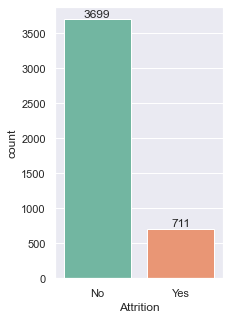

In [158]:
axis=sns.countplot(x='Attrition', data=df_master, palette = "Set2")
axis.bar_label(axis.containers[0])
#axis.bar_label(axis.containers[1])
plt.show()

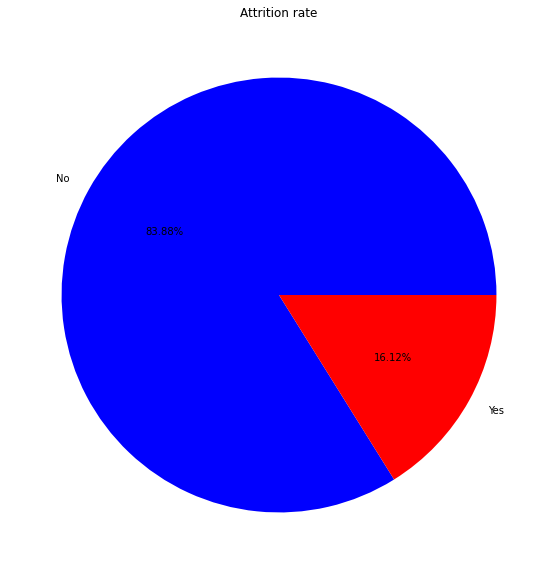

In [44]:
plt.figure(figsize=(10,10))
plt.pie(df_master['Attrition'].value_counts(),labels=df_master.Attrition.unique(),colors='br',autopct='%1.2f%%')
plt.title('Attrition rate')
plt.show()

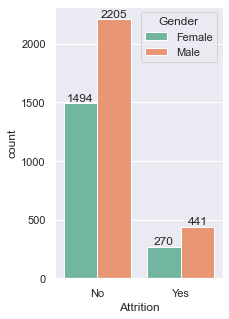

In [173]:
axis=sns.countplot(x='Attrition', hue='Gender', data=df_master, palette = "Set2",)
#plt.xticks(['No','Yes'],['Remained','Left'])
axis.bar_label(axis.containers[0])
axis.bar_label(axis.containers[1])
plt.show()


In [192]:
print('Total Attrition: ','{0:.2f}'.format(711/(3699+711)*100))
print('Attrition rate Female: ','{0:.2f}'.format(270/(270+1494)*100))
print('Attrition rate Male: ','{0:.2f}'.format(441/(441+2205)*100))

Total Attrition:  16.12
Attrition rate Female:  15.31
Attrition rate Male:  16.67


In [ ]:
# The attrition amongst male workers is slightly higher than female workers. 

In [45]:
# JSW has an attrition rate of 16.12%. A high attrition rate means problems for the organisation. 
# According to Monster the average attrition rate in the UK is 15% although depends on each sector.
# According the Employeepedia a healthy attrition rate shouldn't be higher than 10%


# (1) Attrition vs Age, Level of education

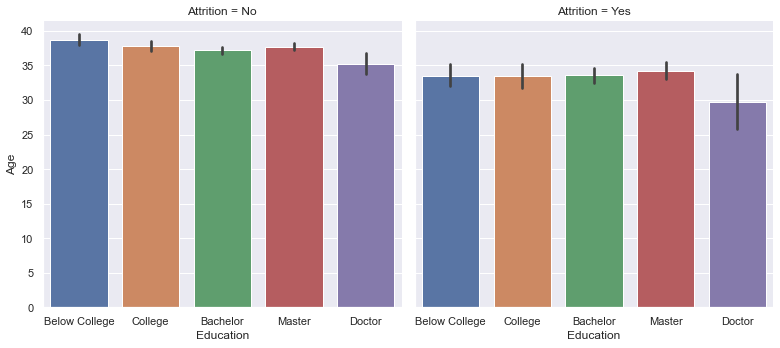

In [141]:
axis=sns.catplot(x="Education", y="Age",
            col="Attrition", aspect=1.1,
            kind="bar", data=df_master)
plt.xticks([0,1,2,3,4],['Below College','College','Bachelor','Master','Doctor'])
plt.show()

In [ ]:
# Same as above but considering Gender

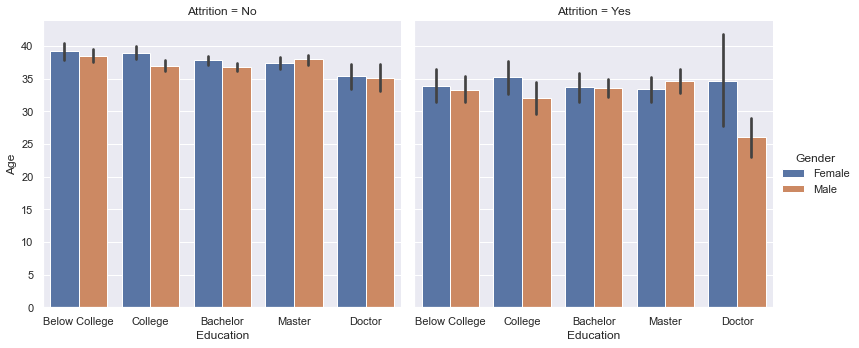

In [194]:
axis=sns.catplot(x="Education", y="Age",hue='Gender',
            col="Attrition", aspect=1.1,
            kind="bar", data=df_master)
plt.xticks([0,1,2,3,4],['Below College','College','Bachelor','Master','Doctor'])
plt.show()

Attrition in relation to Level of education and Age.
Average age for people who remain is above 35. The average age for people who left is under 35 in all education levels
and under 30 for males with doctoral studies.  



# (2) Attrition vs WorkLifeBalance

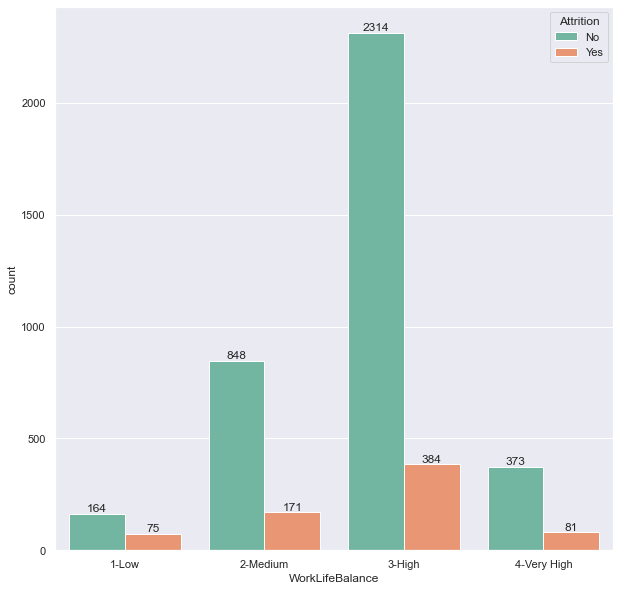

In [202]:
axis=sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df_master, palette = "Set2")
plt.xticks([0,1,2,3],['1-Low','2-Medium','3-High','4-Very High'])
axis.bar_label(axis.containers[0])
axis.bar_label(axis.containers[1])
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

In [217]:
print('Attrition WLB Low: ',((75/711)*100))

Attrition WLB Low:  10.548523206751055


In [218]:
print('Attrition WLB Low: ','{0:.2f}'.format((75/711)*100)) # 711 is total numbe o attritions
print('Attrition WLB Med: ', '{0:.2f}'.format((171/711)*100))
print('Attrition WLB HIgh: ','{0:.2f}'.format((384/711)*100))
print('Attrition WLB V High: ','{0:.2f}'.format((81/711)*100))

Attrition WLB Low:  10.55
Attrition WLB Med:  24.05
Attrition WLB HIgh:  54.01
Attrition WLB V High:  11.39


In [ ]:
# The highest number of attritions happen amongst people with Medium and High Work Life Balance: 24.05 % and 54.01%. 
# However, These two categories also represent the two largest population of workers.
# If calculate  the percentage of attrition relative to the sum of each goup we will have:

In [222]:
print('Attrition WLB Low relative: ','{0:.2f}'.format(75/(75+164)*100)) # 711 is total numbe o attritions
print('Attrition WLB Med relative: ', '{0:.2f}'.format(171/(171+848)*100))
print('Attrition WLB High relative: ', '{0:.2f}'.format(384/(384+2314)*100))
print('Attrition WLB V High relative: ', '{0:.2f}'.format(81/(81+373)*100))

Attrition WLB Low relative:  31.38
Attrition WLB Med relative:  16.78
Attrition WLB High relative:  14.23
Attrition WLB V High relative:  17.84


So, the highest attrition rate taking in consideration each category of WLB seperately, we have that the largest 
attrition rate happen amongstpeople with Low WLB (31.38%); 

# (3) Attrition vs Distance from Work 

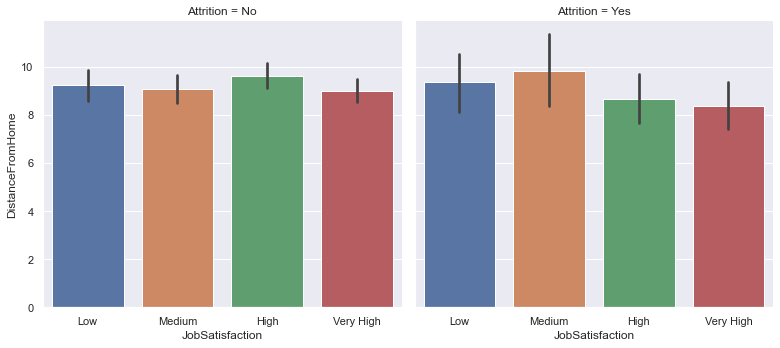

In [223]:
axis=sns.catplot(x="JobSatisfaction", y="DistanceFromHome",
            col="Attrition", aspect=1.1,
            kind="bar", data=df_master)
plt.xticks([0,1,2,3],['Low','Medium','High','Very High'])
plt.show()

 people who left the company were had Low and Medium job satisfaction rate and were amongst the one who traveled the farthest. 

# (4) Attrition By Department

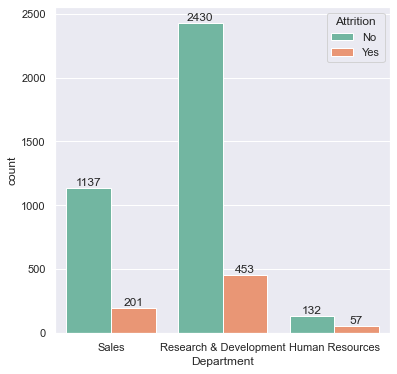

In [235]:
axis=sns.countplot(x='Department', hue='Attrition', data=df_master, palette = "Set2")
axis.bar_label(axis.containers[0])
axis.bar_label(axis.containers[1])
sns.set(rc={'figure.figsize':(10,6)})
plt.show()

In [239]:
# Let's see the relative percentage of attrition to each department
print('Relative Attrition in Sales: ','{0:.2f}'.format(201/(201+1137)*100)) # 711 is total numbe o attritions
print('Relative Attrition in R&D: ', '{0:.2f}'.format(453/(453+2430)*100))
print('Relative Attrition in HR: ', '{0:.2f}'.format(57/(57+132)*100))
print(' Total Attrition in HR: ', '{0:.2f}'.format(57/(57+435+201)*100))
print(' Total Attrition in R&D: ', '{0:.2f}'.format(453/(57+435+201)*100))
print(' Total Attrition in Sales: ', '{0:.2f}'.format(201/(57+435+201)*100))

Relative Attrition in Sales:  15.02
Relative Attrition in R&D:  15.71
Relative Attrition in HR:  30.16
 Total Attrition in HR:  8.23
 Total Attrition in R&D:  65.37
 Total Attrition in Sales:  29.00


Although the attrition in HR represents only 8.23% of total, it has the highest relative pecentage 30.16%

# (5)  Attrition By Business travel

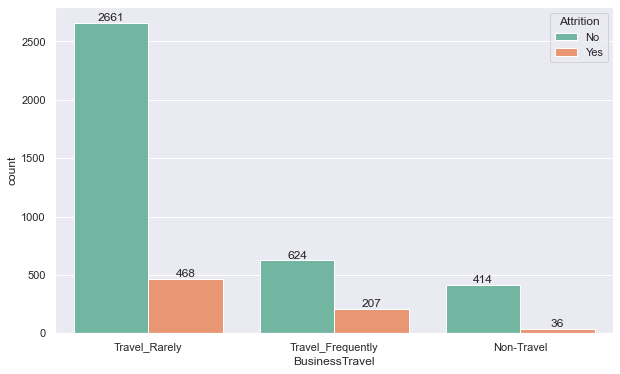

In [240]:
axis=sns.countplot(x='BusinessTravel', hue='Attrition', data=df_master, palette = "Set2")
axis.bar_label(axis.containers[0])
axis.bar_label(axis.containers[1])
sns.set(rc={'figure.figsize':(10,6)})
plt.show()

In [242]:
# Let's see the relative percentage of attrition to each department
print('Relative Attrition Travel_rarely: ','{0:.2f}'.format(468/(468+2661)*100)) # 711 is total numbe o attritions
print('Relative Attrition Travel_Frequently: ', '{0:.2f}'.format(207/(207+624)*100))
print('Relative Attrition No_trave: ', '{0:.2f}'.format(36/(36+414)*100))
print(' Total Attrition Travel_rarely: ', '{0:.2f}'.format(468/(36+207+468)*100))
print(' Total Attrition Travel_Frequently: ', '{0:.2f}'.format(207/(36+207+468)*100))
print(' Total Attrition No_travel: ', '{0:.2f}'.format(36/(36+207+468)*100))

Relative Attrition Travel_rarely:  14.96
Relative Attrition Travel_Frequently:  24.91
Relative Attrition No_trave:  8.00
 Total Attrition Travel_rarely:  65.82
 Total Attrition Travel_Frequently:  29.11
 Total Attrition No_travel:  5.06


workers who rarely travel have the highest total percentage of attrition 65%, but if we look at the relative percentage
we find that it's 14.9% it's still high but not the highest. Workers who travel frequently represent a 29% of total attrition 
and a 24.9% of relative percentage. This indicates that that a possible correlationbetween the level of travel and attrition rate.


# (6) Attrition By Marital status

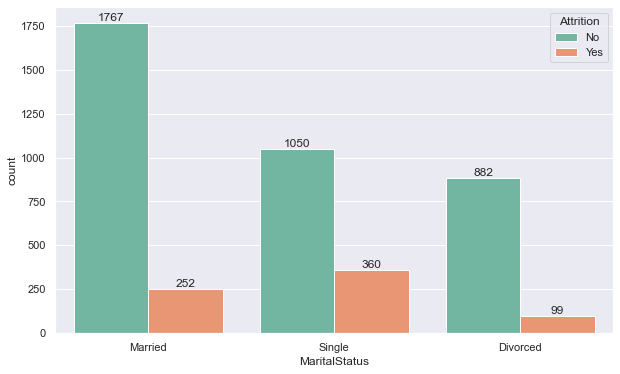

In [249]:
axis=sns.countplot(x='MaritalStatus', hue='Attrition', data=df_master, palette = "Set2")
axis.bar_label(axis.containers[0])
axis.bar_label(axis.containers[1])
sns.set(rc={'figure.figsize':(10,6)})
plt.show()

In [250]:
# Let's see the relative percentage of attrition to each department
print('Relative Attrition Married: ','{0:.2f}'.format(252/(252+1767)*100)) # 711 is total numbe o attritions
print('Relative Attrition Single: ', '{0:.2f}'.format(360/(360+1050)*100))
print('Relative Attrition Divorced: ', '{0:.2f}'.format(99/(99+882)*100))
print(' Total Attrition Married: ', '{0:.2f}'.format(252/(252+360+99)*100))
print(' Total Attrition Single: ', '{0:.2f}'.format(360/(252+360+99)*100))
print(' Total Attrition Divorced: ', '{0:.2f}'.format(99/(252+360+99)*100))

Relative Attrition Married:  12.48
Relative Attrition Single:  25.53
Relative Attrition Divorced:  10.09
 Total Attrition Married:  35.44
 Total Attrition Single:  50.63
 Total Attrition Divorced:  13.92


the highest percentage of attrition is found amongst single workers

# (7) Attrition By Job level

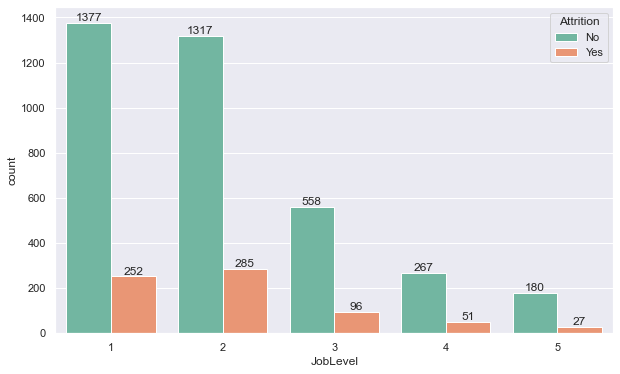

In [251]:
axis=sns.countplot(x='JobLevel', hue='Attrition', data=df_master, palette = "Set2")
axis.bar_label(axis.containers[0])
axis.bar_label(axis.containers[1])
sns.set(rc={'figure.figsize':(10,6)})
plt.show()

In [252]:
# Let's see the relative percentage of attrition to each department
print('Relative Attrition Job Level 1: ','{0:.2f}'.format(252/(252+1377)*100)) # 711 is total numbe o attritions
print('Relative Attrition Job Level 2: ', '{0:.2f}'.format(285/(285+1317)*100))
print('Relative Attrition Job Level 3: ', '{0:.2f}'.format(96/(96+558)*100))
print('Relative Attrition Job Level 4: ', '{0:.2f}'.format(51/(51+267)*100))
print('Relative Attrition Job Level 5: ', '{0:.2f}'.format(27/(27+180)*100))
print(' Total Attrition  Level 1: ', '{0:.2f}'.format(252/(252+285+96+51+27)*100))
print(' Total Attrition  Level 2: ', '{0:.2f}'.format(285/(252+285+96+51+27)*100))
print(' Total Attrition  Level 3: ', '{0:.2f}'.format(96/(252+285+96+51+27)*100))
print(' Total Attrition  Level 4: ', '{0:.2f}'.format(51/(252+285+96+51+27)*100))
print(' Total Attrition  Level 5: ', '{0:.2f}'.format(27/(252+285+96+51+27)*100))

Relative Attrition Job Level 1:  15.47
Relative Attrition Job Level 2:  17.79
Relative Attrition Job Level 3:  14.68
Relative Attrition Job Level 4:  16.04
Relative Attrition Job Level 5:  13.04
 Total Attrition  Level 1:  35.44
 Total Attrition  Level 2:  40.08
 Total Attrition  Level 3:  13.50
 Total Attrition  Level 4:  7.17
 Total Attrition  Level 5:  3.80


Attrition at Level 1 and 2 seem to be the highest amongst attrition percentages

# (8)  Attrition By Role

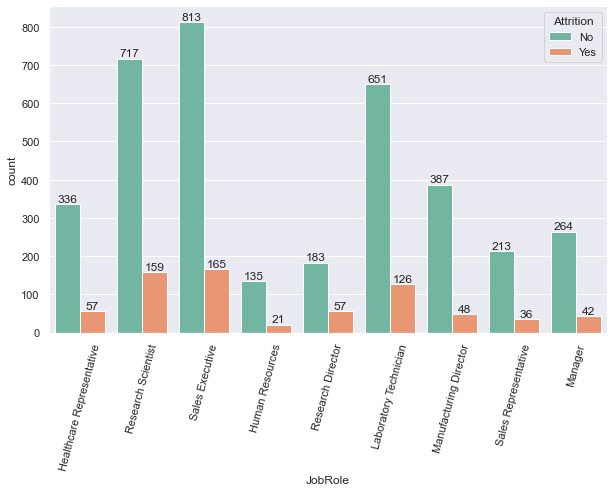

In [263]:
axis=sns.countplot(x='JobRole', hue='Attrition', data=df_master, palette = "Set2")
axis.bar_label(axis.containers[0])
axis.bar_label(axis.containers[1])
sns.set(rc={'figure.figsize':(10,6)})
plt.xticks(rotation=75)
plt.show()

In [265]:
# Let's see the relative percentage of attrition to each department
print('Relative Attrition H_Rep: ','{0:.2f}'.format(57/(57+336)*100)) 
print('Relative Attrition R_S: ', '{0:.2f}'.format(159/(159+717)*100))
print('Relative Attrition S_E: ', '{0:.2f}'.format(165/(165+813)*100))
print('Relative Attrition H_R: ', '{0:.2f}'.format(21/(21+135)*100))
print('Relative Attrition R_D: ', '{0:.2f}'.format(57/(57+183)*100))
print('Relative Attrition  L_T: ', '{0:.2f}'.format(126/(126+651)*100))
print('Relative Attrition M_D: ', '{0:.2f}'.format(48/(48+387)*100))
print('Relative Attrition  S_R: ', '{0:.2f}'.format(36/(36+213)*100))
print('Relative Attrition Man: ', '{0:.2f}'.format(42/(42+264)*100))

print('Total Attrition H_Rep: ','{0:.2f}'.format(57/(711)*100)) 
print('Total Attrition R_S: ', '{0:.2f}'.format(159/(711)*100))
print('Total Attrition S_E: ', '{0:.2f}'.format(165/(711)*100))
print('Total Attrition H_R: ', '{0:.2f}'.format(21/(711)*100))
print('Total Attrition R_D: ', '{0:.2f}'.format(57/(711)*100))
print('Total Attrition  L_T: ', '{0:.2f}'.format(126/(711)*100))
print('Total Attrition  M_D: ', '{0:.2f}'.format(48/(711)*100))
print('Total Attrition  S_R: ', '{0:.2f}'.format(36/(711)*100))
print('Total Attrition  Man: ', '{0:.2f}'.format(42/(711)*100))



Relative Attrition H_Rep:  14.50
Relative Attrition R_S:  18.15
Relative Attrition S_E:  16.87
Relative Attrition H_R:  13.46
Relative Attrition R_D:  23.75
Relative Attrition  L_T:  16.22
Relative Attrition M_D:  11.03
Relative Attrition  S_R:  14.46
Relative Attrition Man:  13.73
Total Attrition H_Rep:  8.02
Total Attrition R_S:  22.36
Total Attrition S_E:  23.21
Total Attrition H_R:  2.95
Total Attrition R_D:  8.02
Total Attrition  L_T:  17.72
Total Attrition  M_D:  6.75
Total Attrition  S_R:  5.06
Total Attrition  Man:  5.91


Total highest are Research Scientist 22.36% (relative 18.15%) and Sales Executive 23.21% (relative 16.87). 
Also, worth mentioning that the reseach diretors have a hight relative percentage 23.75%

# (9) Attrition By Monthly income

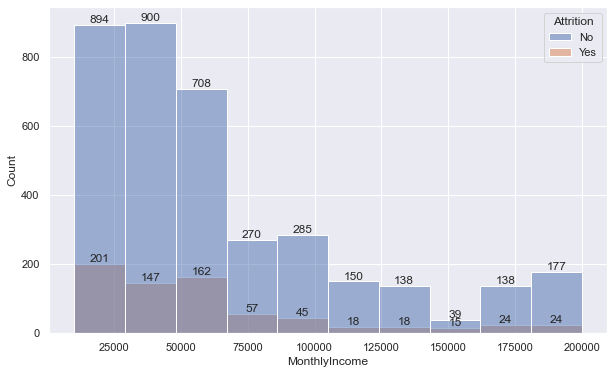

In [281]:
axis=sns.histplot(x=df_master['MonthlyIncome'],hue=df_master['Attrition'],bins=10)
axis.bar_label(axis.containers[0])
axis.bar_label(axis.containers[1])
plt.show()

Most of Attrition cases were registered amongst people with salaries under 75000

# (10) Attrition By Perc salary Hike

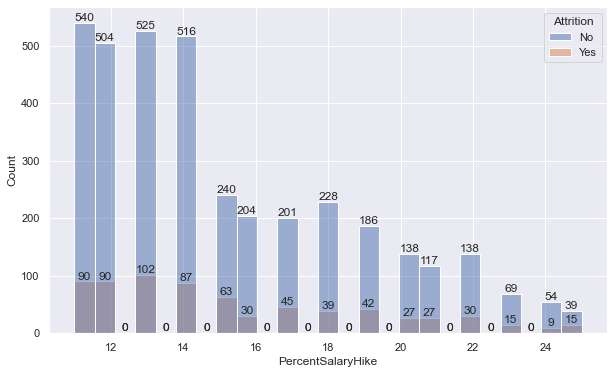

In [283]:
axis=sns.histplot(x=df_master['PercentSalaryHike'],hue=df_master['Attrition'],bins=25)
axis.bar_label(axis.containers[0])
axis.bar_label(axis.containers[1])
plt.show()

We see that the majority of attrition cases happened when the salary percentage hike was in the lower values between 11 and 
11 and 14 %

# (11) Attrition By Stock Level:
#key 0: no stocks, 3 high level of stocks

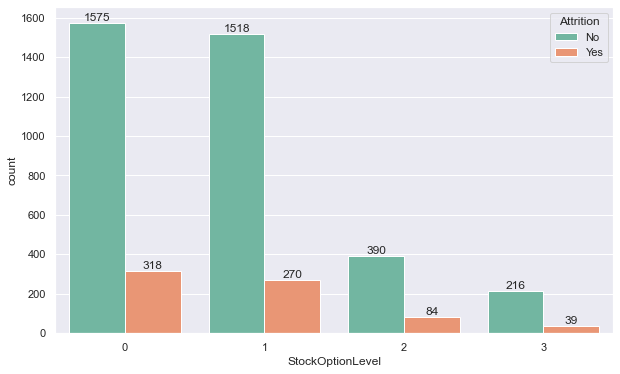

In [284]:
axis=sns.countplot(x='StockOptionLevel', hue='Attrition', data=df_master, palette = "Set2")
axis.bar_label(axis.containers[0])
axis.bar_label(axis.containers[1])
sns.set(rc={'figure.figsize':(10,6)})
#plt.xticks(rotation=75)
plt.show()

In [285]:
print('Relative Attrition 0: ', '{0:.2f}'.format(318/(318+1575)*100))
print('Relative Attrition 1: ', '{0:.2f}'.format(270/(270+1518)*100))
print('Relative Attrition 2: ', '{0:.2f}'.format(84/(84+390)*100))
print('Relative Attrition 3: ', '{0:.2f}'.format(39/(39+216)*100))

print('Total Attrition 0: ','{0:.2f}'.format(318/(711)*100)) 
print('Total Attrition 1: ', '{0:.2f}'.format(270/(711)*100))
print('Total Attrition 2: ', '{0:.2f}'.format(84/(711)*100))
print('Total Attrition 3: ', '{0:.2f}'.format(39/(711)*100))

Relative Attrition 0:  16.80
Relative Attrition 1:  15.10
Relative Attrition 2:  17.72
Relative Attrition 3:  15.29
Total Attrition 0:  44.73
Total Attrition 1:  37.97
Total Attrition 2:  11.81
Total Attrition 3:  5.49


The highest percentages of attrition are amongst people with no stocks or level 1 stocks. however, if we look at th relative
percentages the difference is no very large. 

# (12) Attrition By Num of Companies

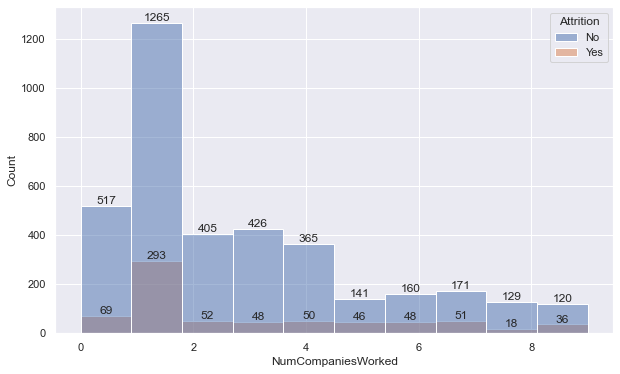

In [310]:
axis=sns.histplot(x=df_master['NumCompaniesWorked'],hue=df_master['Attrition'],bins=10)
axis.bar_label(axis.containers[0])
axis.bar_label(axis.containers[1])
sns.set(rc={'figure.figsize':(15,6)})
plt.show()

In [287]:
print('Relative Attrition 0: ', '{0:.2f}'.format(69/(69+517)*100))
print('Relative Attrition 1: ', '{0:.2f}'.format(293/(293+1265)*100))
print('Relative Attrition 5: ', '{0:.2f}'.format(46/(46+141)*100))
print('Relative Attrition 9: ', '{0:.2f}'.format(36/(36+120)*100))

print('Relative Attrition 0: ', '{0:.2f}'.format(69/(711)*100))
print('Relative Attrition 1: ', '{0:.2f}'.format(293/(711)*100))
print('Relative Attrition 5: ', '{0:.2f}'.format(46/(711)*100))
print('Relative Attrition 9: ', '{0:.2f}'.format(36/(711)*100))



Relative Attrition 0:  11.77
Relative Attrition 1:  18.81
Relative Attrition 5:  24.60
Relative Attrition 9:  23.08
Relative Attrition 0:  9.70
Relative Attrition 1:  41.21
Relative Attrition 5:  6.47
Relative Attrition 9:  5.06


People who have worked with 1 company previously had the highest number of attrition as a total 41% and also a high 
relative percentage of 18.8%. People who worked for 5 and 9 companies previously had the highest relative percentage 
of 24.6% and 23% respectively. 

# (13) Attrition By Total work years at the company

In [ ]:
# Attrition By years at the company

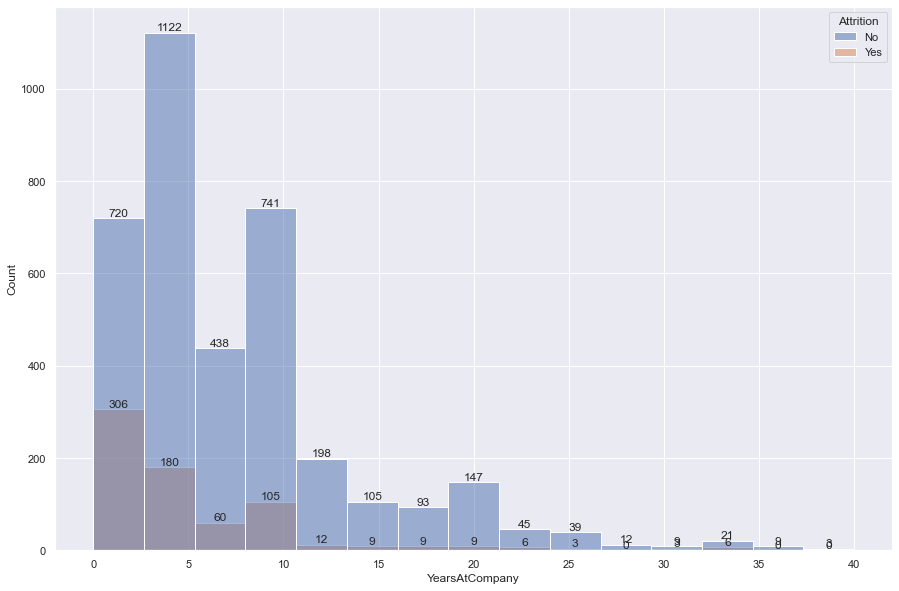

In [321]:
axis=sns.histplot(x=df_master['YearsAtCompany'],hue=df_master['Attrition'],bins=15)
axis.bar_label(axis.containers[0])
axis.bar_label(axis.containers[1])
#sns.set(rc={'figure.figsize':(15,10)})
plt.show()

Most attrition take place amongst people who worked for the company betwen 0 and 10 years. the highest number is between 
0 and 2.5 years. We also have 12 attritions people who worked over 30 years in the company. 

# (14) Attrition years by last promotion

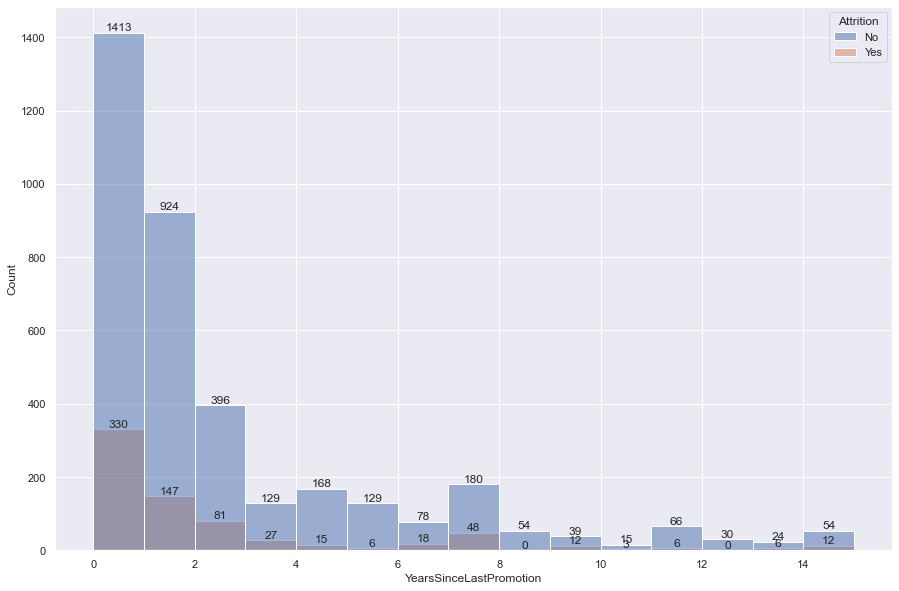

In [322]:
axis=sns.histplot(x=df_master['YearsSinceLastPromotion'],hue=df_master['Attrition'],bins=15)
axis.bar_label(axis.containers[0])
axis.bar_label(axis.containers[1])
#sns.set(rc={'figure.figsize':(15,10)})
plt.show()

In [ ]:
Most cases did not have a promotion yet

In [324]:
print('Relative Attrition 0: ', '{0:.2f}'.format(330/(330+1413)*100))
print('Relative Attrition 1: ', '{0:.2f}'.format(147/(147+924)*100))
print('Relative Attrition 2: ', '{0:.2f}'.format(81/(81+396)*100))
print('Relative Attrition 7: ', '{0:.2f}'.format(48/(48+180)*100))

print('Total Attrition 0: ', '{0:.2f}'.format(330/(711)*100))
print('Total Attrition 1: ', '{0:.2f}'.format(147/(711)*100))
print('Total Attrition 2: ', '{0:.2f}'.format(81/(711)*100))
print('Total Attrition 7: ', '{0:.2f}'.format(48/(711)*100))

Relative Attrition 0:  18.93
Relative Attrition 1:  13.73
Relative Attrition 2:  16.98
Relative Attrition 7:  21.05
Total Attrition 0:  46.41
Total Attrition 1:  20.68
Total Attrition 2:  11.39
Total Attrition 7:  6.75


Most cases did not have a promotion yet or it's been just 1 year since they were promoted. It's also interesting to notice
the relative percentage of attrition amongst people who the last time they were promoted , was 7 years ago. 

# (15) Attrition By years with current manager

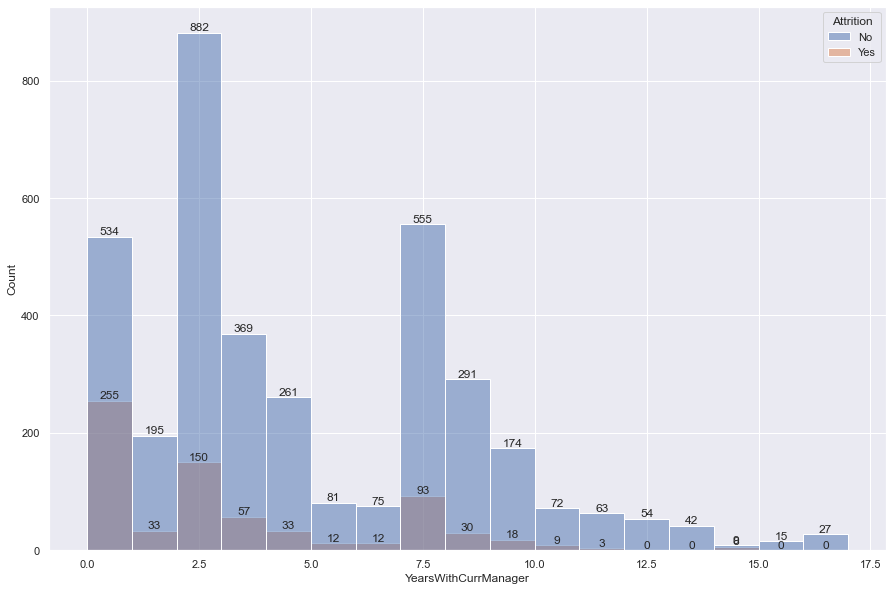

In [331]:
axis=sns.histplot(x=df_master['YearsWithCurrManager'],hue=df_master['Attrition'],bins=17)
axis.bar_label(axis.containers[0])
axis.bar_label(axis.containers[1])
#sns.set(rc={'figure.figsize':(15,10)})
plt.show()


In [332]:
print('Relative Attrition 0-1: ', '{0:.2f}'.format(255/(255+534)*100))
print('Relative Attrition 1-2: ', '{0:.2f}'.format(33/(33+195)*100))
print('Relative Attrition 2-3: ', '{0:.2f}'.format(150/(150+882)*100))
print('Relative Attrition 3-4: ', '{0:.2f}'.format(57/(57+369)*100))
print('Relative Attrition 7-8: ', '{0:.2f}'.format(93/(93+555)*100))

print('Total Attrition 0-1: ', '{0:.2f}'.format(255/(711)*100))
print('Total Attrition 1-2: ', '{0:.2f}'.format(33/(711)*100))
print('Total Attrition 2-3: ', '{0:.2f}'.format(150/(711)*100))
print('Total Attrition 3-4: ', '{0:.2f}'.format(57/(711)*100))
print('Total Attrition 7-8: ', '{0:.2f}'.format(93/(711)*100))

Relative Attrition 0-1:  32.32
Relative Attrition 1-2:  14.47
Relative Attrition 2-3:  14.53
Relative Attrition 3-4:  13.38
Relative Attrition 7-8:  14.35
Total Attrition 0-1:  35.86
Total Attrition 1-2:  4.64
Total Attrition 2-3:  21.10
Total Attrition 3-4:  8.02
Total Attrition 7-8:  13.08


Interesting to notice that most of attrition cases worked had been with their current manager less than 1 year and lowest 
between 1 and 2 years. The number of attrition goes dows as the people had the same manager for longer but it peaks again
between 7 and 8 years with the same manager. 

# (16) Attrition Bytraining time 
key: x-Axis values are training times last year

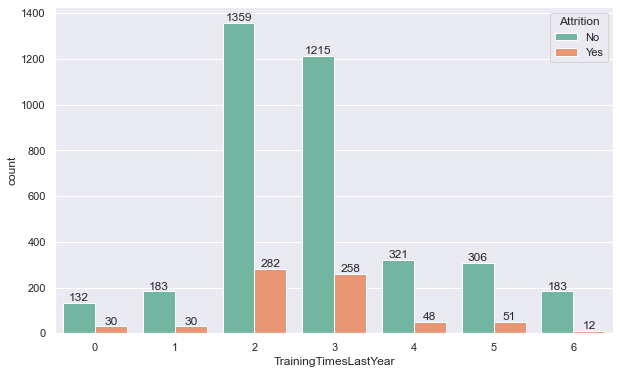

In [336]:
axis=sns.countplot(x='TrainingTimesLastYear', hue='Attrition', data=df_master, palette = "Set2")
axis.bar_label(axis.containers[0])
axis.bar_label(axis.containers[1])
sns.set(rc={'figure.figsize':(10,6)})
#plt.xticks(rotation=75)
plt.show()

In [337]:
print('Relative Attrition 0: ', '{0:.2f}'.format(30/(30+132)*100))
print('Relative Attrition 1: ', '{0:.2f}'.format(30/(30+183)*100))
print('Relative Attrition 2: ', '{0:.2f}'.format(282/(286+1359)*100))
print('Relative Attrition 3: ', '{0:.2f}'.format(258/(258+1215)*100))
print('Relative Attrition 4: ', '{0:.2f}'.format(48/(48+312)*100))
print('Relative Attrition 5: ', '{0:.2f}'.format(51/(51+306)*100))
print('Relative Attrition 6: ', '{0:.2f}'.format(12/(12+183)*100))

print('Total Attrition 0: ', '{0:.2f}'.format(30/(711)*100))
print('Total Attrition 1: ', '{0:.2f}'.format(30/(711)*100))
print('Total Attrition 2: ', '{0:.2f}'.format(282/(711)*100))
print('Total Attrition 3: ', '{0:.2f}'.format(258/(711)*100))
print('Total Attrition 4: ', '{0:.2f}'.format(48/(711)*100))
print('Total Attrition 5: ', '{0:.2f}'.format(51/(711)*100))
print('Total Attrition 6: ', '{0:.2f}'.format(12/(711)*100))

Relative Attrition 0:  18.52
Relative Attrition 1:  14.08
Relative Attrition 2:  17.14
Relative Attrition 3:  17.52
Relative Attrition 4:  13.33
Relative Attrition 5:  14.29
Relative Attrition 6:  6.15
Total Attrition 0:  4.22
Total Attrition 1:  4.22
Total Attrition 2:  39.66
Total Attrition 3:  36.29
Total Attrition 4:  6.75
Total Attrition 5:  7.17
Total Attrition 6:  1.69


Interesting the largest number are amongst people who had training twice and three times last year. 
However, when we look at the relative percentage the highest is amongst people who had 0 training last year. Also notice, that 
the attrition rate amongst people who had 6 times of training last year had the lowest percentage of attrition. 

# (17) Attrition ByTotal Working Years

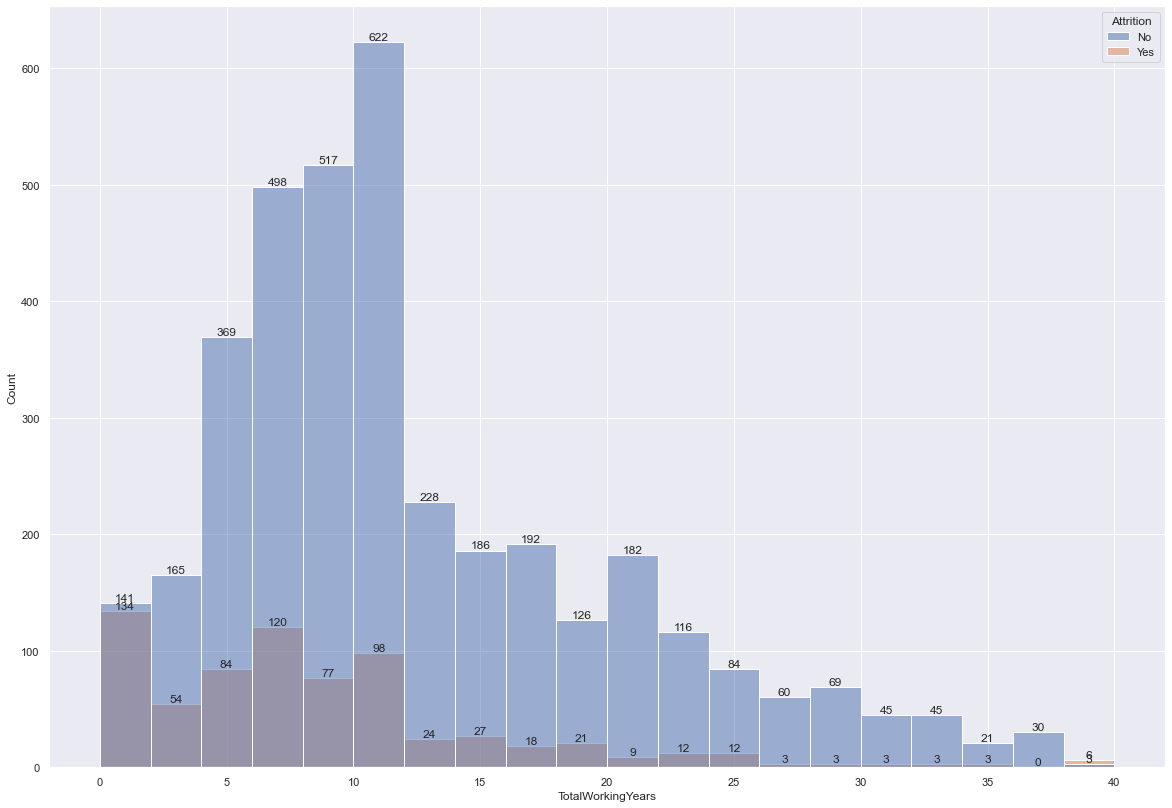

In [345]:
axis=sns.histplot(x=df_master['TotalWorkingYears'],hue=df_master['Attrition'],bins=20)
axis.bar_label(axis.containers[0])
axis.bar_label(axis.containers[1])
sns.set(rc={'figure.figsize':(20,1)})
plt.show()

In [346]:
print('Relative Attrition 0-2: ', '{0:.2f}'.format(134/(134+141)*100))
print('Relative Attrition 0-2: ', '{0:.2f}'.format(54/(54+165)*100))
print('Relative Attrition 0-2: ', '{0:.2f}'.format(84/(84+369)*100))
print('Relative Attrition 6-8: ', '{0:.2f}'.format(120/(120+498)*100))
print('Relative Attrition 8-10: ', '{0:.2f}'.format(77/(77+517)*100))
print('Relative Attrition 10-12: ', '{0:.2f}'.format(98/(98+622)*100))


print('Total Attrition 0-2: ', '{0:.2f}'.format(134/(711)*100))
print('Total Attrition 2-4: ', '{0:.2f}'.format(54/(711)*100))
print('Total Attrition 4-6: ', '{0:.2f}'.format(84/(711)*100))
print('Total Attrition 6-8: ', '{0:.2f}'.format(120/(711)*100))
print('Total Attrition 8-10: ', '{0:.2f}'.format(77/(711)*100))
print('Total Attrition 10-12: ', '{0:.2f}'.format(98/(711)*100))


Relative Attrition 0-2:  48.73
Relative Attrition 0-2:  24.66
Relative Attrition 0-2:  18.54
Relative Attrition 6-8:  19.42
Relative Attrition 8-10:  12.96
Relative Attrition 10-12:  13.61
Total Attrition 0-2:  18.85
Total Attrition 2-4:  7.59
Total Attrition 4-6:  11.81
Total Attrition 6-8:  16.88
Total Attrition 8-10:  10.83
Total Attrition 10-12:  13.78


Strickinly, the biggest percentage of attrition is amongst people with working experience between 0-2 years. 
The percentage seem to drop after 12 years of experience. 

# #5 use the time in time out table.

In [87]:
Employee_time=pd.read_csv('Employee_time.csv')
print("File Imported Successfully")

File Imported Successfully


In [88]:
Employee_time.head()

,EmployeeID,Total_w_days,AvgHours,TotalHours
0,1,232,7.37,1710.69
1,2,236,7.72,1821.68
2,3,242,7.01,1697.20
3,4,235,7.19,1690.51
4,5,245,8.01,1961.51


In [89]:
# Merge Employee time with df_master


df_master2 = pd.merge(df_master,Employee_time,on='EmployeeID')

In [106]:
Employee_time.columns

Index(['EmployeeID', 'Total_w_days', 'AvgHours', 'TotalHours'], dtype='object')

In [98]:
df_master2['TotalHours'].max()

2723.38

In [99]:
df_master2['TotalHours'].min()

1348.8

In [103]:
# If we create a histogram with 10 bins, each Bin's size will 
bin_size= (df_master2['TotalHours'].max()-df_master2['TotalHours'].min())/10
print ('Bin Size is: ', bin_size)

Bin Size is:  137.45800000000003


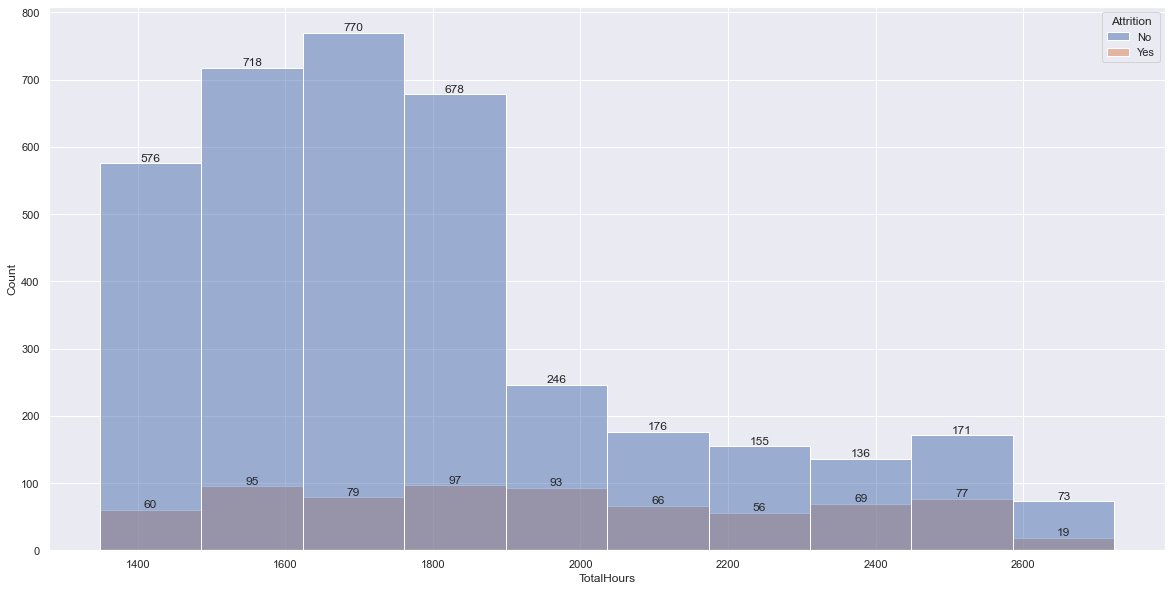

In [102]:
axis=sns.histplot(x=df_master2['TotalHours'],hue=df_master2['Attrition'],bins=10)
axis.bar_label(axis.containers[0])
axis.bar_label(axis.containers[1])
sns.set(rc={'figure.figsize':(20,10)})
plt.show()

In [104]:
print('Relative Attrition bin 1: ', '{0:.2f}'.format(60/(60+576)*100))
print('Relative Attrition bin 2: ', '{0:.2f}'.format(95/(95+718)*100))
print('Relative Attrition bin 3: ', '{0:.2f}'.format(79/(79+770)*100))
print('Relative Attrition bin 4: ', '{0:.2f}'.format(97/(79+678)*100))
print('Relative Attrition bin 5: ', '{0:.2f}'.format(93/(93+246)*100))
print('Relative Attrition bin 6: ', '{0:.2f}'.format(66/(66+176)*100))
print('Relative Attrition bin 7: ', '{0:.2f}'.format(56/(56+155)*100))
print('Relative Attrition bin 8: ', '{0:.2f}'.format(69/(69+136)*100))
print('Relative Attrition bin 9: ', '{0:.2f}'.format(77/(77+171)*100))
print('Relative Attrition bin 10: ', '{0:.2f}'.format(19/(19+73)*100))


print('Total Attrition bin 1: ', '{0:.2f}'.format(60/(711)*100))
print('Total Attrition bin 2: ', '{0:.2f}'.format(95/(711)*100))
print('Total Attrition bin 3: ', '{0:.2f}'.format(79/(711)*100))
print('Total Attrition bin 4: ', '{0:.2f}'.format(97/(711)*100))
print('Total Attrition bin 5: ', '{0:.2f}'.format(93/(711)*100))
print('Total Attrition bin 6: ', '{0:.2f}'.format(66/(711)*100))
print('Total Attrition bin 7: ', '{0:.2f}'.format(56/(711)*100))
print('Total Attrition bin 8: ', '{0:.2f}'.format(69/(711)*100))
print('Total Attrition bin 9: ', '{0:.2f}'.format(77/(711)*100))
print('Total Attrition bin 10: ', '{0:.2f}'.format(19/(711)*100))

Relative Attrition bin 1:  9.43
Relative Attrition bin 2:  11.69
Relative Attrition bin 3:  9.31
Relative Attrition bin 4:  12.81
Relative Attrition bin 5:  27.43
Relative Attrition bin 6:  27.27
Relative Attrition bin 7:  26.54
Relative Attrition bin 8:  33.66
Relative Attrition bin 9:  31.05
Relative Attrition bin 10:  20.65
Total Attrition bin 1:  8.44
Total Attrition bin 2:  13.36
Total Attrition bin 3:  11.11
Total Attrition bin 4:  13.64
Total Attrition bin 5:  13.08
Total Attrition bin 6:  9.28
Total Attrition bin 7:  7.88
Total Attrition bin 8:  9.70
Total Attrition bin 9:  10.83
Total Attrition bin 10:  2.67


We can see an increase of attrition from bin 4 onwards (1,800 of yearly working hours)

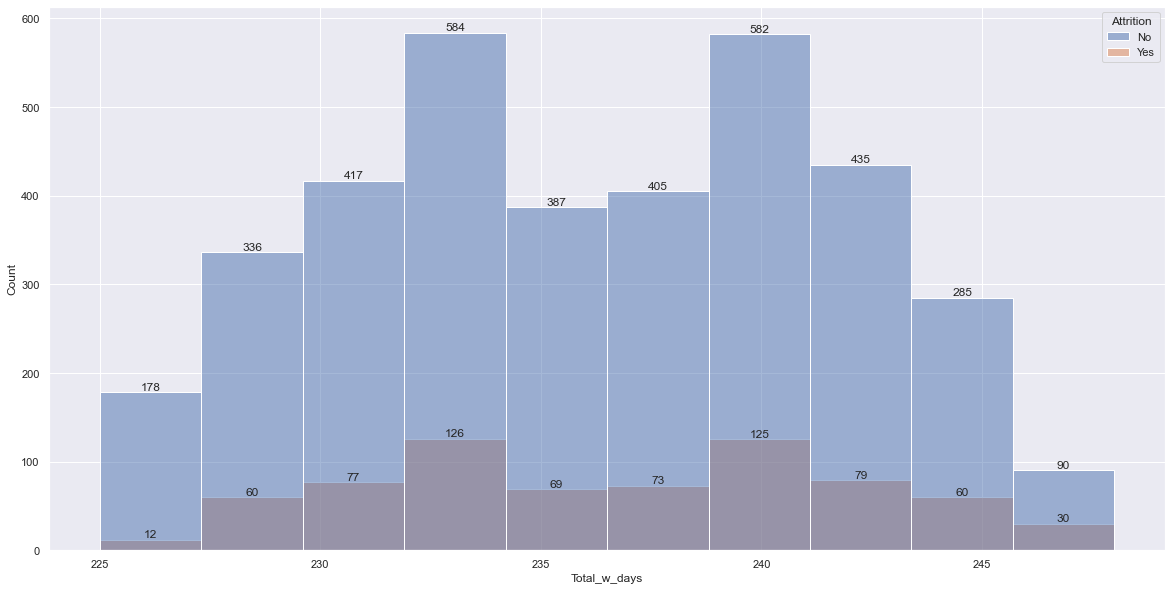

In [107]:
axis=sns.histplot(x=df_master2['Total_w_days'],hue=df_master2['Attrition'],bins=10)
axis.bar_label(axis.containers[0])
axis.bar_label(axis.containers[1])
sns.set(rc={'figure.figsize':(20,10)})
plt.show()

In [109]:
print('Relative Attrition bin 3: ', '{0:.2f}'.format(77/(77+417)*100))
print('Relative Attrition bin 4: ', '{0:.2f}'.format(126/(126+584)*100))
print('Relative Attrition bin 5: ', '{0:.2f}'.format(69/(69+367)*100))
print('Relative Attrition bin 9: ', '{0:.2f}'.format(60/(60+285)*100))
print('Relative Attrition bin 10: ', '{0:.2f}'.format(30/(30+90)*100))


print('Total Attrition bin 3: ', '{0:.2f}'.format(77/(711)*100))
print('Total Attrition bin 4: ', '{0:.2f}'.format(126/(711)*100))
print('Total Attrition bin 5: ', '{0:.2f}'.format(69/(711)*100))
print('Total Attrition bin 9: ', '{0:.2f}'.format(60/(711)*100))
print('Total Attrition bin 10: ', '{0:.2f}'.format(30/(711)*100))

Relative Attrition bin 3:  15.59
Relative Attrition bin 4:  17.75
Relative Attrition bin 5:  15.83
Relative Attrition bin 9:  17.39
Relative Attrition bin 10:  25.00
Total Attrition bin 3:  10.83
Total Attrition bin 4:  17.72
Total Attrition bin 5:  9.70
Total Attrition bin 9:  8.44
Total Attrition bin 10:  4.22


Although, there is not a clear pattern between days worked and attrition generally,
there is a clear increase in attrition between bin 9 and 10 (people working over 145 days a year)

In [110]:
df_master2.to_csv('cleaned_hr_data')

In [116]:
df_master2.to_excel('cleaned_jwc_hr_data.xlsx') 